In [4]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math

ALLOWED_NAMES = {
    k: v for k, v in np.__dict__.items() if not k.startswith("__")
}

def f(function, x, x1, x2, d1, d2):
  return eval(function, {"__builtins__": {}, "x": x, "x1": x1, "x2": x2, "d1": d1, "d2": d2}, ALLOWED_NAMES)

def goldenSectionSearch(function, a, b, x1, x2, d1, d2):
  goldenRatio = (5**(1/2) - 1) / (2)
  e = 1e-6
  time = 0
  timeout = 100
  xa, xb = 0, 0

  while time < timeout:
    d = goldenRatio * (b - a)
    xa = a + d
    xb = b - d
    fxa = f(function, xa, x1, x2, d1, d2)
    fxb = f(function, xb, x1, x2, d1, d2)

    if math.fabs(xb - xa) < e:
      break

    if fxa > fxb:
      b = xa
    elif fxb > fxa:
      a = xb

    time += 1

  return [xa, fxa]

In [5]:


def plot3D(function, min, range=5):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.set_title(f'f(x) = {function}', fontsize=10)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    x1 = np.arange(-range, range, 0.15)
    x2 = np.arange(-range, range, 0.15)
    x1, x2 = np.meshgrid(x1, x2)
    z = eval(function, {"__builtins__": {}, "x1": x1, "x2": x2}, ALLOWED_NAMES)

    ax.plot_surface(x1, x2, z, rstride=1, cstride=1, cmap='viridis', label=f'f(x) = {function}')
    
    ax.scatter(min[0], min[1], color='red', label=f'Mínimo')

def plotContour(function, min, range=5):
    fig = plt.figure()
    ax = fig.add_subplot()

    ax.set_title(f'f(x) = {function}', fontsize=10)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    x1 = np.arange(-range, range, 0.15)
    x2 = np.arange(-range, range, 0.15)
    x1, x2 = np.meshgrid(x1, x2)
    z = eval(function, {"__builtins__": {}, "x1": x1, "x2": x2}, ALLOWED_NAMES)

    ax.contour(x1, x2, z, colors='blue')
    
    ax.scatter(min[0], min[1], color='red', label=f'Mínimo')

    plt.show()



lmbda0: 2.360679774997898 => y0: [2.360679774997898, 3.0]
lmbda1: -2.9999994184141423 => y1: [2.360679774997898, 5.815858576951882e-07]
lmbda^1: -0.3824110386043518 => y3: [1.4579297704286642, 1.1472334749940614] d:[2.360679774997898,-2.9999994184141423]
lmbda0: -1.457929262705427 => y0: [5.07723237230806e-07, 1.1472334749940614]
lmbda1: -1.1472324396183469 => y1: [5.07723237230806e-07, 1.0353757144976328e-06]
lmbda^1: 7.358425252512158e-07 => y3: [-5.650831130759985e-07, 1.9119329907875544e-07] d:[-1.457929262705427,-1.1472324396183469]
lmbda0: 7.037598388125694e-07 => y0: [1.3867672573657096e-07, 1.9119329907875544e-07]
lmbda1: -1.0833988938757861e-07 => y1: [1.3867672573657096e-07, 8.285340969117683e-08]
[1.38676726e-07 8.28534097e-08]


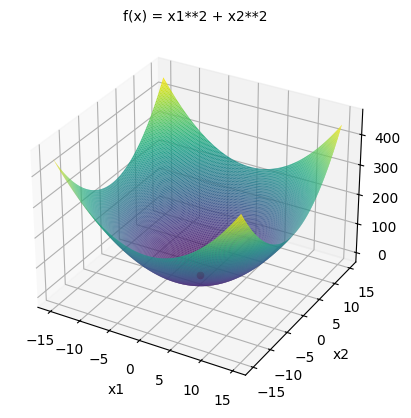

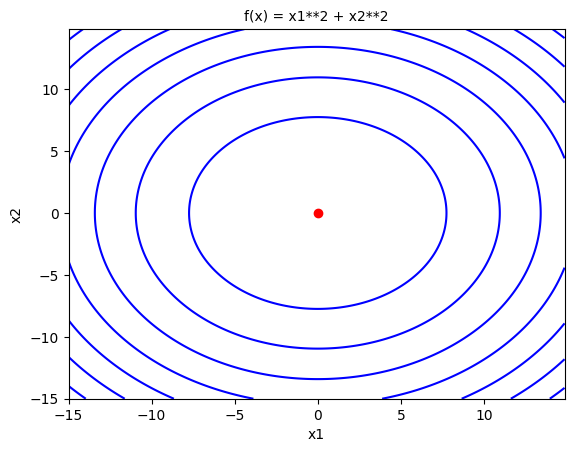

In [6]:
def hookeJeeves(function, initialValue, dim):
    x1, x2 = initialValue[0], initialValue[1]
    nextValue = np.array(["(x1 + x*d1)", "(x2 + x*d2)"])
    nextFunc = function.replace("x1", nextValue[0]).replace("x2", nextValue[1])

    d = np.array(
        [[1.0,0.0], 
        [0.0,1.0]]
    )

    e = 1e-6
    k = 0
    timeout = 100
    time = 0
    
    while time < timeout:
        start = np.array([x1, x2])
        end = np.array([0, 0])

        for k in range(dim):          
            d1, d2 = d[k][0], d[k][1]

            [x, y] = goldenSectionSearch(nextFunc, x1-10 if k == 0 else x2-10, x1+10 if k == 0 else x2+10, x1, x2, d1, d2)

            x1, x2 = eval(nextValue[0]), eval(nextValue[1])

            print(f'lmbda{k}: {x} => y{k}: [{x1}, {x2}]')

            if k == dim-1:
                end = np.array([x1, x2])

        resultd = end - start

        if LA.norm(resultd) < e:
            break
        
        d1, d2 = resultd[0], resultd[1]

        [x, y] = goldenSectionSearch(nextFunc, x1-10 if k == 0 else x2-10, x1+10 if k == 0 else x2+10, x1, x2, d1, d2)

        x1, x2 = eval(nextValue[0]), eval(nextValue[1])

        print(f'lmbda^{k}: {x} => y3: [{x1}, {x2}] d:[{d1},{d2}]')

        time += 1

    return end
    
function = "x1**2 + x2**2"
initialValue = np.array([0, 3])

min = hookeJeeves(function, initialValue, 2)

print(min)

plot3D(function, min, 15)
plotContour(function, min, 15)